# Exit Surveys of the DETE and TAFE - Why did people quit?

In this project, we are going to be exploring data consisting of exit survey responses from employees of the Department of Education, Training and Employment and the Technical and Further Education Institute. We will take time to clean the data properly and then proceed to answer two questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

You can find the datasets here:
[DETE Exit Survey](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
[TAFE Exit Survey](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

Let's start with reading the data in!

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

#Dete info
print("Info on the DETE Exit Surveys:")
print(dete_survey.info())
print(dete_survey.head())

Info on the DETE Exit Surveys:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-

In [2]:
print("Info on the TAFE Exit Surveys:")
print(tafe_survey.info())
print(tafe_survey.head())

Info on the TAFE Exit Surveys:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                             

Looking at both datasets, there is a whole jumble of mess.

In the DETE dataset, we can note that:

- There are multiple columns with multiple null objects
- Age is counted as a string since there are entries such as "61 and older"
- Role Start Date has "Not Stated" as a value
- The last 5 columns have an enormous amount of NaN/None's/missing values

In the TAFE dataset, we can note that:

- All of the fields are questions of the survey
- Multiple columns have empty fields, suggesting that people skipped questions

Both dataframes also contain multiple columns that we do not need for our analysis.

First thing we will do is deal with the cases of the "Not Stated" values in certain columns, changing them to NaN. Then, we will drop the columns we don't need.

In [3]:
dete = pd.read_csv("dete_survey.csv", na_values = "Not Stated")

dete_updated = dete.drop(dete.columns[28:49], axis = 1)
tafe_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

tafe_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

The code above reads in the same csv file again, but this time, it replaces all values in the dataset that have a "Not Stated" value to an NaN. 

Then, we update the dataframes by dropping the columns we don't need. In this case, for the DETE survey, we dropped from the Professional Development to the Health & Safety columns. 

For the TAFE survey, we dropped from the "Which of these was the main factor for leaving?" column to the "Would you recommend the Institute as an employer to others?" column.

These changes were made so that our analysis and our answering of the questions introduced a little while ago can proceed smoothly.

Now, we need to change and format the column names. Both datasets share some of the same data, but the column names are completely different.

In [4]:
#Remove trailing whitespace, replace spaces with underscores, and make lowercase
dete_updated.columns = dete_updated.columns.str.replace(" ", "_").str.rstrip().str.lower()

#Rename columns in tafe_updated
renames = {
    "Record ID" : "id",
    "Institute" : "institute",
    "WorkArea" : "WorkArea",
    "CESSATION YEAR" : "cease_date",
    "Reason for ceasing employment" : "separationtype",
    'Contributing Factors. Career Move - Public Sector ' : 'Contributing Factors. Career Move - Public Sector ',
    'Contributing Factors. Career Move - Private Sector ' : 'Contributing Factors. Career Move - Private Sector ',
    'Contributing Factors. Career Move - Self-employment' : 'Contributing Factors. Career Move - Self-employment',
    'Contributing Factors. Ill Health' : 'Contributing Factors. Ill Health',
    'Contributing Factors. Maternity/Family': 'Contributing Factors. Maternity/Family',
    'Contributing Factors. Dissatisfaction' : 'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction' : 'Contributing Factors. Job Dissatisfaction',
    'Contributing Factors. Interpersonal Conflict' : 'Contributing Factors. Interpersonal Conflict',
    'Contributing Factors. Study' : 'Contributing Factors. Study',
    'Contributing Factors. Travel' : 'Contributing Factors. Travel',
    'Contributing Factors. Other' : 'Contributing Factors. Other',
    'Contributing Factors. NONE' : 'Contributing Factors. NONE',
    "Gender. What is your Gender?" : "gender",
    "CurrentAge. Current Age" : "age",
    "Employment Type. Employment Type" : "employment_status",
    "Classification. Classification" : "position",
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_updated = tafe_updated.rename(renames, axis = 1)

In [5]:
tafe_updated.head()

,id,institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
dete_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


For the DETE Survey dataframe, I changed all of the column names to lowercase, stripped them of trailing whitespace, and replaced any spaces with underscores. This was done to keep it more conventional and easier to remember when calling their names during analysis.

For the TAFE Survey dataframe, I updated some of the column names to make them more readable. Other columns names have not been changed yet, but we will worry about them later. 

For now, the important thing to note is that the columns are much more user-friendly and readable now. 

Now, we will look into what columns we need to answers our questions

# Checking Separation Types

In [7]:
print(dete_updated["separationtype"].value_counts())
print(" ")
print(tafe_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
 
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


For this project, we are interested in only the people who answered "Resignation" as their reason for separation. Let's filter those responses out.

In [8]:
dete_resignations = dete_updated[(dete_updated["separationtype"] == "Resignation-Other reasons") | 
                                 (dete_updated["separationtype"] ==  "Resignation-Other employer") | 
                                 (dete_updated["separationtype"] == "Resignation-Move overseas/interstate") ].copy()

tafe_resignations = tafe_updated[tafe_updated["separationtype"] == "Resignation"]

dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [9]:
tafe_resignations.head()

,id,institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


We chose resignations as our data to analyze because we are wondering why certain people chose to resign rather than any other reason for their separation from the two departments. 

## Checking for data inconsistencies

We're not done with cleaning and manipulating data yet, but now we will turn our attention to making sure the data itself isn't corrupted/inaccurate. This must always be done before attemption to analyze anything, or else you can run into major problems along the way. 

First, we will focus on verifying the cease_date and dete_start_date columns make sense.

In [10]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

As we can see, there are values that are years by themselves, and a month followed by a year.

In [11]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(
r"([1-2][0-9]{3})", expand = True).astype(float)

dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

We have successfully extracted the year from the previous values. Now, let's look at the TAFE survey dataset and the dete_start_date column in both.

In [12]:
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [13]:
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

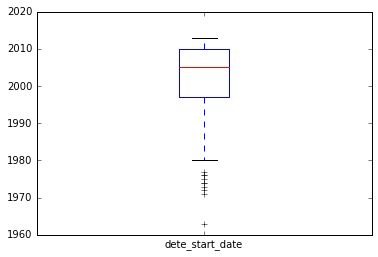

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
dete_resignations["dete_start_date"].plot(kind = "box")
plt.show()

As we can see from the boxplot above, as well as the value counts of the data shown above, there aren't many major issues with the years. Most people that work at the DETE start in their 20s, but they could be well over that. For exmaple, the person who started in 1963. 

However, the data does not span quite the same number of years. A few of the start dates date back to the 80s, 70s, and 1963, with usually only 1 or 2 people belonging to those. We can proceed to drop rows with those years, using only start dates from 1990 onwards.

In [15]:
dete_resignations = dete_resignations[dete_resignations["dete_start_date"] >= 1990]

We are getting closer to being able to answer our question. However, we must do something first before we do.

In the HR field, the length of time someone spent working at a company is referred to as their years of *service*. 

This is indicated by the institute_service column in the tafe_resignations dataframe. We need to create an indentical column like that in the dete_resignations dataframe.

In [16]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0
12,13,Resignation-Other reasons,2012.0,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0
14,15,Resignation-Other employer,2012.0,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0
22,23,Resignation-Other reasons,2012.0,1997.0,1998.0,School Administrative Staff,NaN,Metropolitan,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
25,26,Resignation-Other reasons,2012.0,1995.0,2002.0,Teacher,Primary,South East,NaN,Permanent Part-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,17.0
27,28,Resignation-Other employer,2012.0,2005.0,2011.0,Public Servant,AO5-AO7,Central Office,Information and Technologies,Permanent Full-time,...,False,False,Female,21-25,Yes,NaN,NaN,NaN,NaN,7.0


Awesome!

Now we can granularize a little more. We will determine of the employees who resigned, which were due to dissatisfaction. 

## Checking for the Reason Behind Dissatisfaction

In [17]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [18]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Looking at this, it looks like both columns have multiple "-" values, which would count as missing. To counter this, we will create a new column that stores either a "True", "False", or "NaN" value depending on the answer.

In [19]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-":
        return False
    else:
        return True

dete_diss_columns = ["job_dissatisfaction", "dissatisfaction_with_the_department"
                    , "physical_work_environment", "lack_of_recognition"
                    , "lack_of_job_security", "work_location", "employment_conditions"
                    , "work_life_balance", "workload"]

tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", 
                   "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(1, skipna = False)
tafe_resignations_up = tafe_resignations.copy()
dete_resignations["dissatisfied"] = dete_resignations[dete_diss_columns].any(1, skipna = False)
dete_resignations_up = dete_resignations.copy()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



What I did here was update values in two columns in the TAFE Survey dataframe depending on their current values, and then proceed to create a new column in the dataframe which would have a value of "True" if any value in the two columns was "True", "False" if all values in the two columns were "False", and "NaN" if there was a missing value.

The same was done for the DETE Survey dataframe.
 
## Combining Dataframes

Now that we're done cleaning up the data as much as possible, we are ready to combine the dataframes in order to perform our analysis and answer our question. In order to make it easier for us to determine which row belongs to which dataframe, we will add an "institute" column that signifies that. 

In [20]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                2
nesb                                                     6
aboriginal                                               7
disability                                               8
business_unit                                           27
classification                                         130
region                                                 212
role_start_date                                        238
workload                                               249
dete_start_date                                        249
dissatisfaction_with_the_department                    249
employment_conditions                                  249
work_location                                          249
job_dissatisfaction                                    249
lack_of_job_security                                   249
lack_of_recognition                                    2

In [21]:
#Drop columns with less than 500 non-null values
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

But wait! We still have some data to clean.

If we look at the institute_service column...

In [22]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
12.0                   6
14.0                   6
22.0                   6
17.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
19.0                   3
21.0                   3
23.0                   2
Name: institute_service, dtype: int64

The values are all over the place. The best way to deal with this is by categorizing them. We will do so in the following way:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

## Categorizing the Institute Years of Service

In [23]:
combined_updated["institute_service"] = combined_updated["institute_service"].astype(str).str.extract(
    r"(\d+)", expand = True).astype(float)

In [24]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7.0,Teacher,Resignation-Other reasons
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18.0,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3.0,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15.0,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3.0,Teacher,Resignation-Move overseas/interstate


In [25]:
def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3.0:
        return "New"
    elif 3.0 <= val <= 6.0:
        return "Experienced"
    elif 7.0 <= val <= 10.0:
        return "Established"
    else:
        return "Veteran"

combined_updated["service_cat"] = combined_updated["institute_service"].apply(career_stage)


In [26]:
combined_updated["service_cat"].value_counts(dropna = False)

New            193
Experienced    172
Veteran        104
Established     62
NaN             58
Name: service_cat, dtype: int64

In the previous few blocks of code, I formatted the institute service column in a way where it would only have floats as values. After that, I applied a function that would categorize the years of service into different named categories and inputted those into a newly creative column service_cat.

This was done so that we now have a cleaner and more concise way of knowing the amount of time an employee spent at a company. 

## Calculating the Percentage of Dissatisfied Employees

In this section, we will be calculating the percentage of employees who are dissatisfied by the categories of their years of service.

In [28]:
combined_updated["dissatisfied"].value_counts(dropna = False)

False    370
True     211
NaN        8
Name: dissatisfied, dtype: int64

In [34]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(value = False)
combined_updated["dissatisfied"].value_counts(dropna = False)

False    378
True     211
Name: dissatisfied, dtype: int64

In [37]:
combined_updated_pv = combined_updated.pivot_table(index = "service_cat", values = "dissatisfied")
combined_updated_pv

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.451923


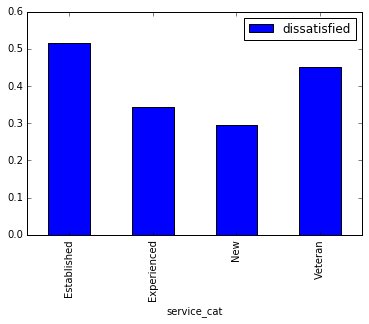

In [38]:
combined_updated_pv.plot(kind = "bar")

As we can see here, most of the data shows that Established employees, employees who had worked for around 7 - 10 years, show the most dissatisfaction as reason for leaving the DETE or TAFE. Newer employees did not feel as dissatisfied as other employees, most likely because since they had just started, they don't have a more complete opinion to form about being dissatisfied. 

## Conclusion

Now, to answer our questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

From the graph above, we can determine that employees that have been at the institutes for longer show signs of dissatisfaction as being their primary reason for resigning more than that shown by newer employees. 

We still have to answer the question:

- 2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

I will get to this question in some time, but I hope that you enjoyed reading through my project! 